# import libs

In [4]:
import pandas as pd
import numpy as np
import keras
import sklearn.preprocessing
from imblearn.over_sampling import SMOTE
import pickle

#Read_csv

In [5]:
df = pd.read_csv('data.csv',index_col=0)
df=df.drop(columns='timestamp')
X = df.iloc[:,:-1].values## read values apart from the last comlumn
y = df.iloc[:,-1].values## read the last column

# preprocess

In [6]:
scalar = sklearn.preprocessing.StandardScaler()
X_scalered= scalar.fit_transform(X)


# Divide X and y as train, test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scalered, y, test_size = 0.2, random_state = 0)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#Model_construction

In [9]:
import sklearn.ensemble
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100,max_depth=300, random_state=1)
clf.fit(X_resampled, y_resampled)
y_predict = clf.predict(X_test)

Confusion matrix

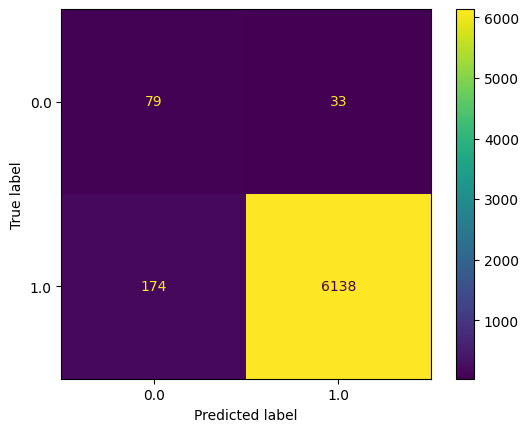

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

#Export the pickle model

In [11]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)